In [1]:
from pathlib import Path
import os
import pandas as pd
from es_sfgtools.processing.operations.gnss_ops import rinex_to_kin,read_kin_data,plot_kin_results_wrms,get_wrms_from_res
pride_path = Path.home() / ".PRIDE_PPPAR_BIN"
os.environ["PATH"] += os.pathsep + str(pride_path)

Test 1: Validate PRIDE PPP_AR Processing

*Overview: 

Process the same rinex file using different PRIDE PPP-AR installations on
ES and UW software
Files tested: the rinex2 file sfg11770.23o and the rinex3 file
SFG100XXX_R_20231770000_01D_01S_MO.rnx
Output files to compare: XYZ antenna positions logged in kin files generated by PRIDE
Expected residuals: Very small, perhaps < millimeter level.

Other notes:

There is a bit of nuance here since there are two different formats of rinex data
that may be used at this step in the processing chain, namely ES currently uses rinex v2
while UW currently uses rinex v3. For completeness, we will validate PRIDE runs using
both rinex2 and rinex3 files derived from the same day of raw data. If we find that the
PRIDE installations are generating significantly different outputs, this could be a sign
that one of the softwares is using more appropriate processing flags when executing
PRIDE, that there is a significant version difference in the two PRIDE installations, or
that there is a major discrepancy in the orbital products used.

In [2]:
prideDir = Path("/Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain/Pride")
writeDir = Path(
    "/Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX"
)
rnx_v2 = writeDir / "SFG100XXX_R_20231770000_01D_01S_MO.rnx"
rnx_v3 = writeDir / "sfg11770.23o"

In [3]:
kin_v2, res_v2 = rinex_to_kin(
    source=rnx_v2, writedir=writeDir, pridedir=prideDir, site="TST1"
)
kin_v2_df = read_kin_data(kin_v2.local_path)

Converting RINEX file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/SFG100XXX_R_20231770000_01D_01S_MO.rnx to kin file
1;33mwarning:0m no observation for GNSS (E)
1;33mwarning:0m no observation for GNSS (C)
1;33mwarning:0m no observation for GNSS (J)
1;33mwarning:0m no satellite orbit for GNSS (J):  WUM0MGXRAP_20231770000_01D_05M_ORB.SP3
1;33mwarning:0m no OSB for GNSS (J): L1 L2
Converted RINEX file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/SFG100XXX_R_20231770000_01D_01S_MO.rnx to kin file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/kin_2023177_tst1.kin
Found PRIDE res file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/res_2023177_tst1.res


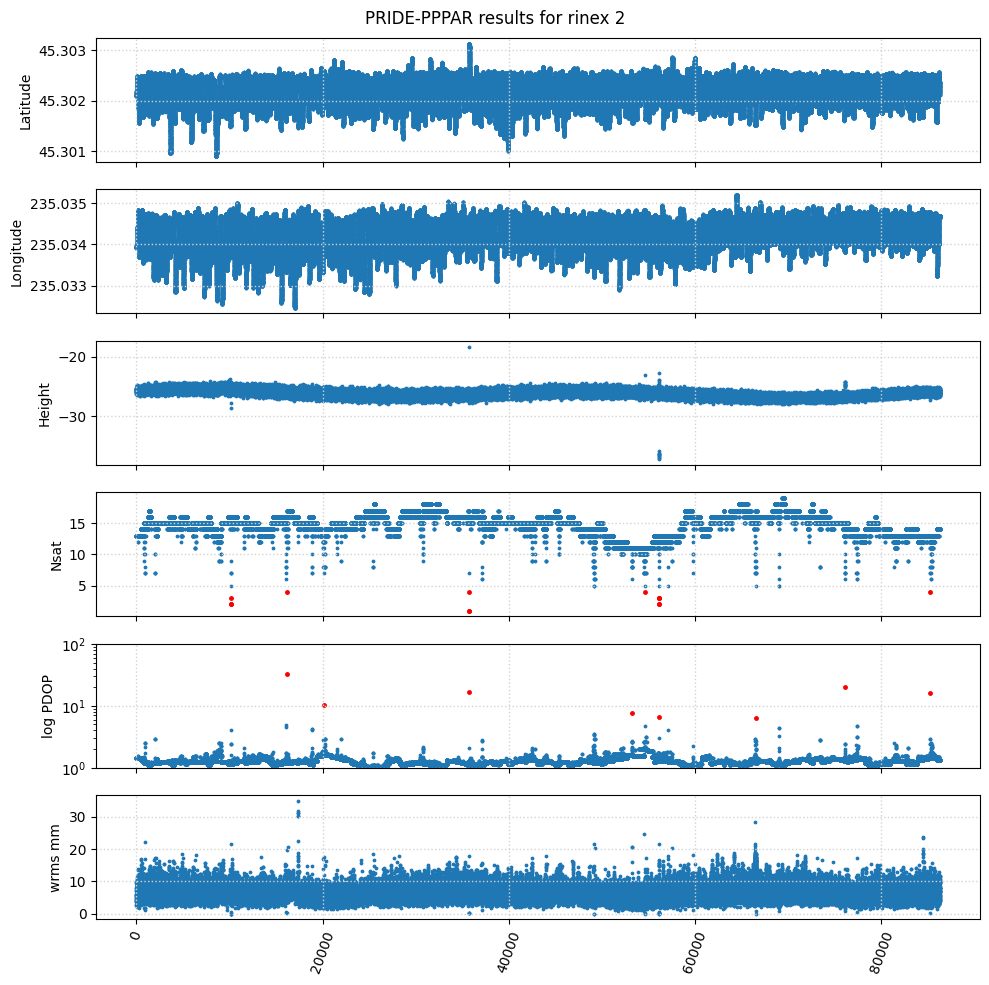

In [6]:
kin_v2_df = read_kin_data(kin_v2.local_path)
kin_v2_wrms_df = get_wrms_from_res(res_v2.local_path)
kin_v2_df_final = kin_v2_df.merge(
    kin_v2_wrms_df, left_index=True, right_on="date", sort=True
)
plot_kin_results_wrms(kin_v2_df_final, title="rinex 2")

In [7]:
kin_v3, res_v3 = rinex_to_kin(
    source=rnx_v3, writedir=writeDir, pridedir=prideDir, site="TST2"
)
kin_v3_df = read_kin_data(kin_v3.local_path)


Converting RINEX file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/sfg11770.23o to kin file
1;33mwarning:0m no observation for GNSS (E)
1;33mwarning:0m no observation for GNSS (C)
1;33mwarning:0m no observation for GNSS (J)
1;33mwarning:0m no satellite orbit for GNSS (J):  WUM0MGXRAP_20231770000_01D_05M_ORB.SP3
1;33mwarning:0m no OSB for GNSS (J): L1 L2
Converted RINEX file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/sfg11770.23o to kin file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/kin_2023177_tst2.kin
Found PRIDE res file /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/GARPOS_Benchmarking_RINEX/res_2023177_tst2.res


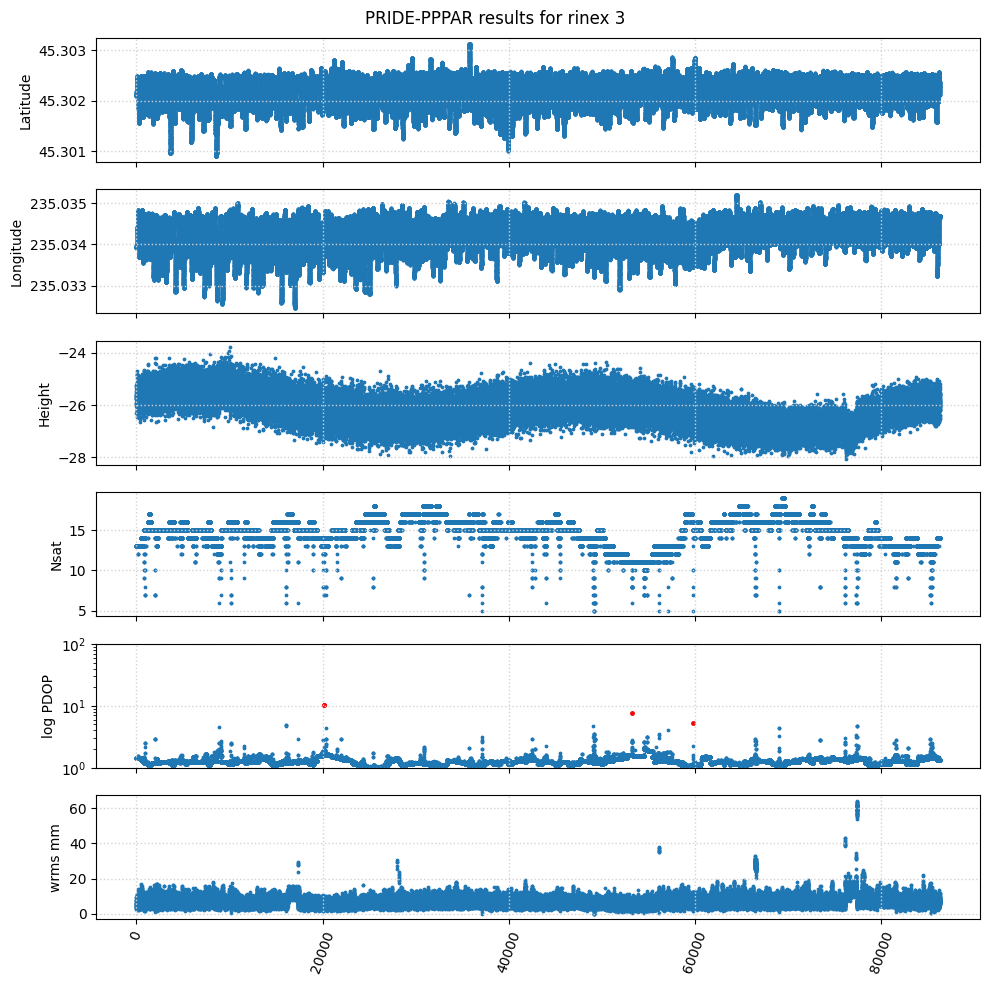

In [10]:
kin_v3_wrms_df = get_wrms_from_res(res_v3.local_path)
kin_v3_df_final = kin_v3_df.merge(kin_v3_wrms_df, left_index=True, right_on="date", sort=True)
plot_kin_results_wrms(kin_v3_df_final, title="rinex 3")